# Naive Bayes

Author  : David Darigan

ID      : C00263218

## Process

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Data Modelling
5. Evaluation
6. Goto 1

## CHANGELOG

The changes are listed in descending order (the most-recent change will be at the bottom)

### Change #1

Using dataset 'nvb_heartfailure_1.csv'

Initial Data Statistics

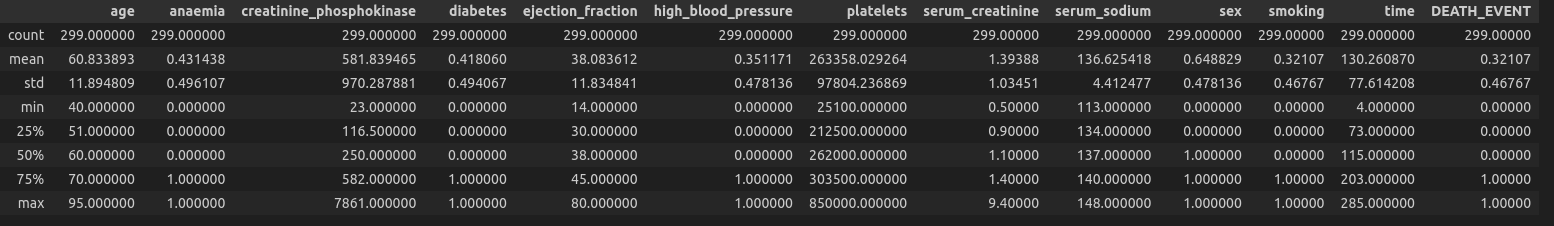

- Target variable is 'DEATH_EVENT' where 0 is 'no death' and 1 is 'death'
- Test Size is 0.2
- Random State is 42
- Using 'Gaussian Naive Bayes' as the model

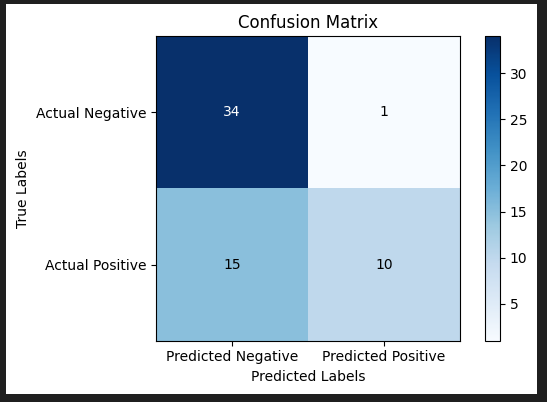
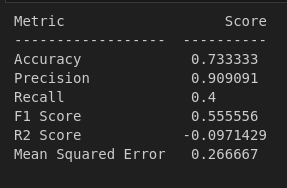

Obversations:

- 73% is usually considered a decent accuracy, however since this is a medical dataset it is considerably lower. An accuracy of 85-90% would be preferable. This is compounded by the fact that our highest false predictions were false negatives rather than false positives, the latter being preferable in medical settings, just 'in case'.

### Change #2

Split initial statistics into a table for survive (DEATH_EVENT == 0) and those who did not (DEATH_EVENT == 1)

__SURVIVE STATISTICS__

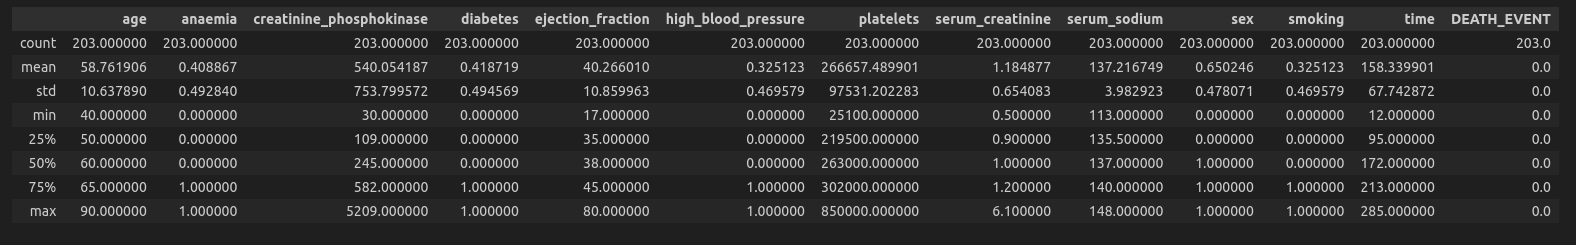

__DEATH STATISTICS__

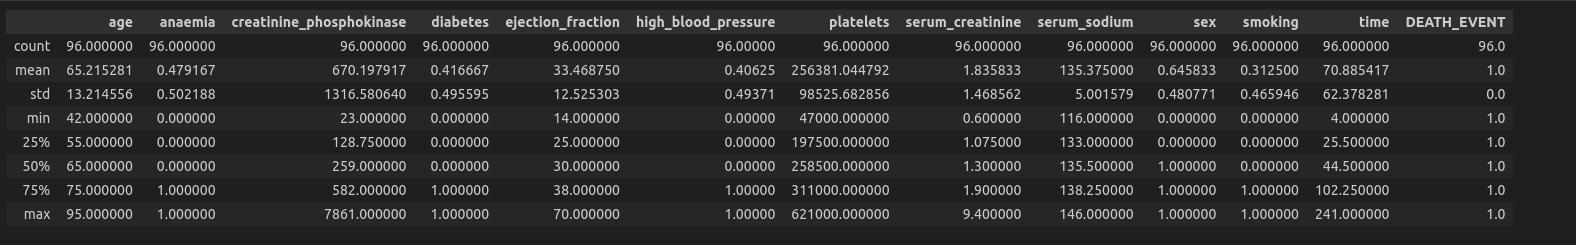

Obversations

- The most immediate difference here is the ejection fraction (the rate at which your heart pumps blood). The less it is pumping, the more likely people are to die from heart failure.

### Change #3

- Change test sample size to 0.6

<img src="img/confusion2.png" alt="drawing" width="500"/>

<img src="img/scores2.png" alt="drawing" width="500"/>

Obversations

- The result set is larger but has the same level of accuracy as before.

### Change #4

- Return test sample to 0.2
- Changed random state to 13

<img src="img/confusion3.png" alt="drawing" width="500"/>
<img src="img/scores3.png" alt="drawing" width="500"/>

Obversations

- Accuracy has improved
- False negatives are still higher than false positives.

### Change #5

- Change dataset to 'nvb_heartfailure_2.csv'
- Some data was non-numeric, so each non numeric column used an enumeration of unique values as its numeric indicator

<img src="img/survive.png" alt="drawing" width="1000"/>
<img src="img/death.png" alt="drawing" width="1000"/>
<br>
<img src="img/confusion4.png" alt="drawing" width="500"/>
<img src="img/scores4.png" alt="drawing" width="500"/>

Observations

- Accuracy is siginificantly increased
- False positives are higher than false negatives

### Change #6

- Dropped 'Sex' column

<img src="img/confusion5.png" alt="drawing" width="500"/>
<img src="img/scores5.png" alt="drawing" width="500"/>

Observations

- Accuracy dropped somewhat, this change would be more obvious given a larger dataset

### Change #7

- Stopped dropping 'sex' column
- Changed to Multinominal Naive Bayes
    - This required normalizing Oldpeak & ST_Slope to 0 and 1 because we cannot use negative values in Multinominal

<img src="img/confusion6.png" alt="drawing" width="500"/>
<img src="img/scores6.png" alt="drawing" width="500"/>

Observations

Without any parameter tuning, this is very inaccurate.
R2 score is negative so dropping sex seems like a terrible idea

### Change #8

- Set alpha parameter of all values to 1000 

<img src="img/confusion7.png" alt="drawing" width="500"/>
<img src="img/scores7.png" alt="drawing" width="500"/>

Observations

- R2 score is still in the negative indicating poor performance
- Confusion Matrix has additional values but no improved accuracy

### Change #9

<!--<img src="img/confusion2.png" alt="drawing" width="500"/>
<img src="img/scores2.png" alt="drawing" width="500"/>

### Change #10

<!--<img src="img/confusion2.png" alt="drawing" width="500"/>
<img src="img/scores2.png" alt="drawing" width="500"/>

## CODE

### Dependencies

In [25]:
%pip install tabulate
%pip install numpy
%pip install matplotlib
%pip install scikit-learn
%pip install tensorflow
%pip install pandas


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 1. Business Understanding

Charting which features, such as age, sex or ejection fraction etc are likely to lead to heart failure

Features:
age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT

### 2. Data Understanding

In [127]:
# Data Collection
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd


data = pd.read_csv('datasets/nvb_heartfailure_2.csv')

#### 2.1 Descriptive Statistics

In [128]:
survive = data[data['HeartDisease'] == 0]
death = data[data['HeartDisease'] == 1]

In [71]:
survive.describe()

,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,1.017073,130.180488,227.121951,0.107317,0.548780,148.151220,0.134146,0.408049,0.260976,0.0
std,0.934114,16.499585,74.634659,0.309894,0.805732,23.288067,0.341226,0.699709,0.511663,0.0
min,0.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-1.100000,0.000000,0.0
25%,0.000000,120.000000,197.250000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,130.000000,227.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,140.000000,266.750000,0.000000,1.000000,165.000000,0.000000,0.600000,0.000000,0.0
max,3.000000,190.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,0.0


In [72]:
death.describe()

,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,1.803150,134.185039,175.940945,0.334646,0.647638,127.655512,0.622047,1.274213,0.942913,1.0
std,0.576179,19.828685,126.391398,0.472332,0.804238,23.386923,0.485354,1.151872,0.497220,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,1.0
25%,2.000000,120.000000,0.000000,0.000000,0.000000,112.000000,0.000000,0.000000,1.000000,1.0
50%,2.000000,132.000000,217.000000,0.000000,0.000000,126.000000,1.000000,1.200000,1.000000,1.0
75%,2.000000,145.000000,267.000000,1.000000,1.000000,144.250000,1.000000,2.000000,1.000000,1.0
max,3.000000,200.000000,603.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,1.0


### 3. Data Preparation

##### 3.1 Handing Missing Values

In [28]:
# CODE

##### 3.2 Dealing With Outliers

In [37]:
# CODE

##### 3.3 Transforming Data

In [131]:
# Converting sex value to numerical


from sklearn.preprocessing import MinMaxScaler



for i, column in enumerate(data.columns):
    # Is the column a non-number object?
    if data[column].dtype == 'object':    
        # Enumerate the column and use the indexes as the numeric
        mapping = {val: j for j, val in enumerate(data[column].unique())}
        data[column] = data[column].map(mapping)

scaler = MinMaxScaler()
data['Oldpeak'] = scaler.fit_transform(data[['Oldpeak']])
data['ST_Slope'] = scaler.fit_transform(data[['ST_Slope']])


##### 3.4 Feature Scaling

In [34]:
# CODE

##### 3.5 Handling Categorical Variables

In [35]:
# CODE

##### 3.6 Feature Engineering

In [65]:
# CODE


##### 3.7 Data Splitting

In [132]:
# CODE
from sklearn.model_selection import train_test_split


y = data['HeartDisease']
X = data.drop('HeartDisease', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


##### 3.8 Addressing Data Imbalance

In [32]:
# CODE

##### 3.9 Data Normalization

In [33]:
# CODE

### 4. Modelling

In [133]:
# Select Modeling Technique
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

Age = 1000
Sex = 1000
ChestPainType = 1000
RestingBP = 1000
Cholesterol = 1000
FastingBS = 1000
RestingECG = 1000
MaxHR = 1000
ExerciseAngina = 1000
Oldpeak = 1000
ST_Slope = 1000


# Training & Testing
model = MultinomialNB(alpha=[Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope], force_alpha=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### 5 Evaluation

##### 5.1 Score Table

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from tabulate import tabulate


# Compute cross-validated scores
accuracy_scores = accuracy_score(y_true=y_test, y_pred=y_pred) #, cv=5, scoring='accuracy')
precision_scores = precision_score(y_true=y_test, y_pred=y_pred)
recall_scores = recall_score(y_true=y_test, y_pred=y_pred)
f1_scores = f1_score(y_true=y_test, y_pred=y_pred)
r2_scores = r2_score(y_true=y_test, y_pred=y_pred)
mean_squared_errors = mean_squared_error(y_true=y_test, y_pred=y_pred)


# # Tabulate the scores
headers = ['Metric', 'Score']
scores = [
    ['Accuracy', accuracy_scores],
    ['Precision', precision_scores],
    ['Recall', recall_scores],
    ['F1 Score', f1_scores],
    ['R2 Score', r2_scores],
    ['Mean Squared Error', mean_squared_errors]
]

# # Print the table
print(tabulate(scores, headers=headers))


Metric                  Score
------------------  ---------
Accuracy             0.619565
Precision            0.71831
Recall               0.50495
F1 Score             0.593023
R2 Score            -0.536443
Mean Squared Error   0.380435


##### Confusion Matrix

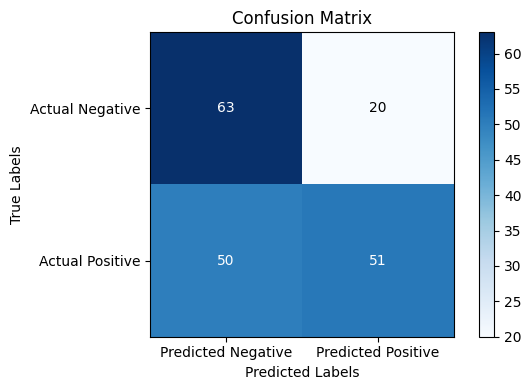

In [135]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.tight_layout()

plt.show()


### Deployment

In [17]:
import joblib

# Pickling The Model
# joblib.dump(model, "model.pkl")